# Loan Prediction - Complete Data Exploration & Analysis
**Date:** December 23, 2025  
**Goal:** Comprehensive understanding of the loan dataset to identify patterns and build predictive models

## Dataset Overview
- **Source:** Kaggle Loan Prediction Dataset
- **Purpose:** Predict loan approval based on applicant information
- **Datasets:** Training data (with target) and Test data (without target)

---

## 1. Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import warnings
import os
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# ✅ CREATE FOLDER FOR SAVING VISUALIZATIONS
viz_folder = '../visualizations/eda_plots'
os.makedirs(viz_folder, exist_ok=True)

print("="*70)
print("📁 VISUALIZATION FOLDER CREATED")
print("="*70)
print(f"All plots will be saved to: {viz_folder}")
print("="*70 + "\n")

# Load datasets
train_df = pd.read_csv('../data/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('../data/test_Y3wMUE5_7gLdaTN.csv')

print("="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"Training Dataset shape: {train_df.shape}")
print(f"Test Dataset shape: {test_df.shape}")
print("\n" + "="*70)

📁 VISUALIZATION FOLDER CREATED
All plots will be saved to: ../visualizations/eda_plots

DATASET LOADED SUCCESSFULLY
Training Dataset shape: (614, 13)
Test Dataset shape: (367, 12)



## 2. Initial Data Inspection

In [3]:
# Display first few rows
print("Training Data - First 5 rows:")
display(train_df.head())
print("\n" + "="*70 + "\n")

Training Data - First 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Features Overview:
- **Loan_ID**: Unique identifier for each loan application
- **Gender**: Male/Female
- **Married**: Yes/No
- **Dependents**: Number of dependents (0, 1, 2, 3+)
- **Education**: Graduate/Not Graduate
- **Self_Employed**: Yes/No
- **ApplicantIncome**: Applicant's income
- **CoapplicantIncome**: Co-applicant's income
- **LoanAmount**: Loan amount requested (in thousands)
- **Loan_Amount_Term**: Term of loan (in months)
- **Credit_History**: Credit history meets guidelines (1/0)
- **Property_Area**: Urban/Semiurban/Rural
- **Loan_Status**: Target variable (Y=Approved, N=Rejected)

In [4]:
# Dataset information - Training Data
print("="*70)
print("TRAINING DATA INFORMATION")
print("="*70)
train_df.info()
print("\n" + "="*70 + "\n")

# Dataset information - Test Data
print("="*70)
print("TEST DATA INFORMATION")
print("="*70)
test_df.info()

TRAINING DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


TEST DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries,

In [5]:
# Compare datasets
print("="*70)
print("COMPARING TRAIN VS TEST DATA")
print("="*70)
print(f"\nTrain shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nColumns only in train: {set(train_df.columns) - set(test_df.columns)}")
print(f"Columns only in test: {set(test_df.columns) - set(train_df.columns)}")

COMPARING TRAIN VS TEST DATA

Train shape: (614, 13)
Test shape: (367, 12)

Columns only in train: {'Loan_Status'}
Columns only in test: set()


## 3. Missing Values Analysis

In [6]:
# Missing values - Training Data
print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

missing_train = train_df.isnull().sum()
missing_percent_train = (missing_train / len(train_df)) * 100
missing_df_train = pd.DataFrame({
    'Missing_Count': missing_train,
    'Percentage': missing_percent_train.round(2)
})

print("\nTRAINING DATA:")
print(missing_df_train[missing_df_train['Missing_Count'] > 0].sort_values('Percentage', ascending=False))

# Missing values - Test Data
missing_test = test_df.isnull().sum()
missing_percent_test = (missing_test / len(test_df)) * 100
missing_df_test = pd.DataFrame({
    'Missing_Count': missing_test,
    'Percentage': missing_percent_test.round(2)
})

print("\nTEST DATA:")
print(missing_df_test[missing_df_test['Missing_Count'] > 0].sort_values('Percentage', ascending=False))

MISSING VALUES ANALYSIS

TRAINING DATA:
                  Missing_Count  Percentage
Credit_History               50        8.14
Self_Employed                32        5.21
LoanAmount                   22        3.58
Dependents                   15        2.44
Loan_Amount_Term             14        2.28
Gender                       13        2.12
Married                       3        0.49

TEST DATA:
                  Missing_Count  Percentage
Credit_History               29        7.90
Self_Employed                23        6.27
Gender                       11        3.00
Dependents                   10        2.72
Loan_Amount_Term              6        1.63
LoanAmount                    5        1.36


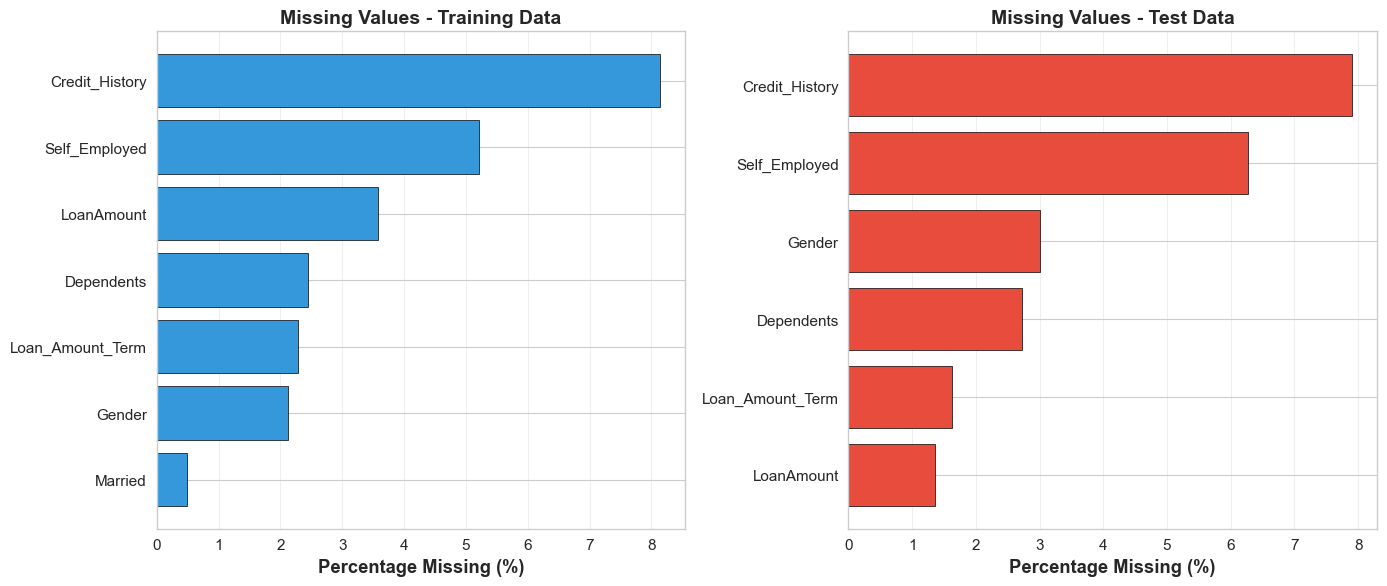

In [7]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training data
missing_train_plot = missing_df_train[missing_df_train['Missing_Count'] > 0].sort_values('Percentage')
axes[0].barh(missing_train_plot.index, missing_train_plot['Percentage'], color='#3498db', edgecolor='black')
axes[0].set_xlabel('Percentage Missing (%)', fontweight='bold')
axes[0].set_title('Missing Values - Training Data', fontweight='bold', fontsize=14)
axes[0].grid(axis='x', alpha=0.3)

# Test data
missing_test_plot = missing_df_test[missing_df_test['Missing_Count'] > 0].sort_values('Percentage')
axes[1].barh(missing_test_plot.index, missing_test_plot['Percentage'], color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Percentage Missing (%)', fontweight='bold')
axes[1].set_title('Missing Values - Test Data', fontweight='bold', fontsize=14)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_folder}/01_missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Target Variable Analysis (Loan_Status)

In [8]:
# Target variable distribution
print("="*70)
print("TARGET VARIABLE DISTRIBUTION (LOAN_STATUS)")
print("="*70)
print("\nValue Counts:")
print(train_df['Loan_Status'].value_counts())
print("\nPercentage:")
print(train_df['Loan_Status'].value_counts(normalize=True).mul(100).round(2))

TARGET VARIABLE DISTRIBUTION (LOAN_STATUS)

Value Counts:
Loan_Status
Y    422
N    192
Name: count, dtype: int64

Percentage:
Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


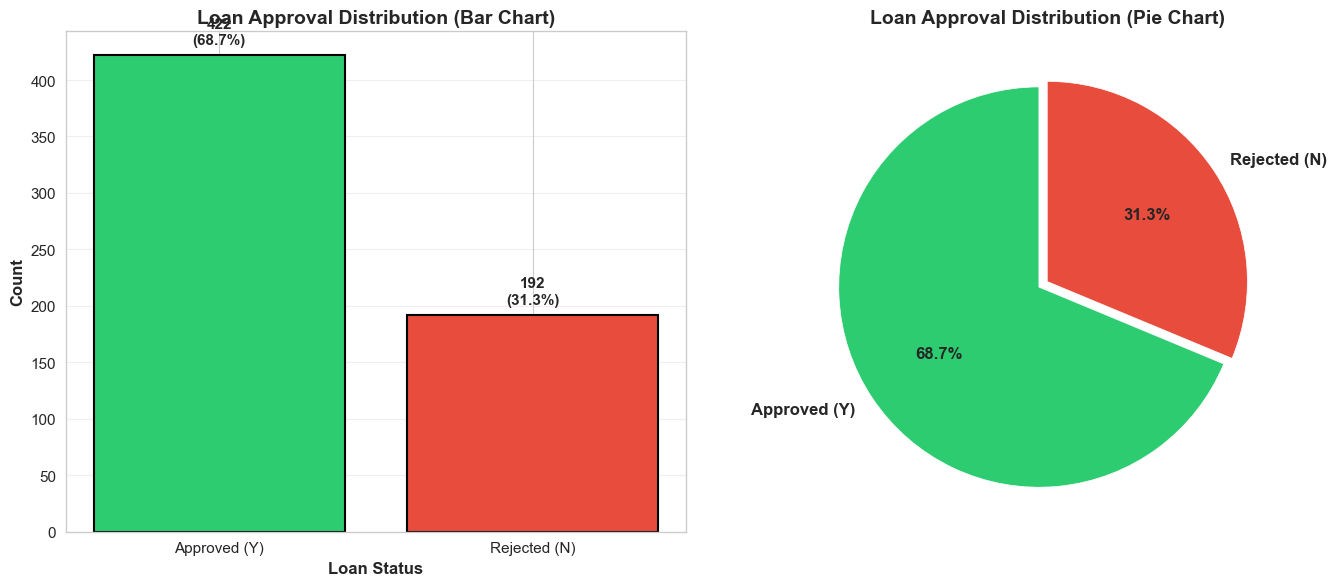


⚠️ Dataset is somewhat imbalanced: 68.7% approved vs 31.3% rejected


In [9]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
loan_counts = train_df['Loan_Status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for approved, red for rejected
bars = axes[0].bar(loan_counts.index, loan_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Loan Status', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Loan Approval Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Approved (Y)', 'Rejected (N)'])
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(loan_counts.values):
    pct = v/len(train_df)*100
    axes[0].text(i, v + 10, f'{v}\n({pct:.1f}%)', ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(loan_counts.values, 
           labels=['Approved (Y)', 'Rejected (N)'],
           autopct='%1.1f%%',
           colors=colors,
           startangle=90,
           explode=(0.05, 0),
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Loan Approval Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{viz_folder}/02_target_variable_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Dataset is somewhat imbalanced: 68.7% approved vs 31.3% rejected")

## 5. Statistical Summary

In [10]:
# Statistical summary - Training Data
print("="*70)
print("STATISTICAL SUMMARY - TRAINING DATA")
print("="*70)
display(train_df.describe())

print("\n" + "="*70 + "\n")

# Statistical summary - Test Data
print("="*70)
print("STATISTICAL SUMMARY - TEST DATA")
print("="*70)
display(test_df.describe())

STATISTICAL SUMMARY - TRAINING DATA


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000




STATISTICAL SUMMARY - TEST DATA


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## 6. Numerical Features Distribution

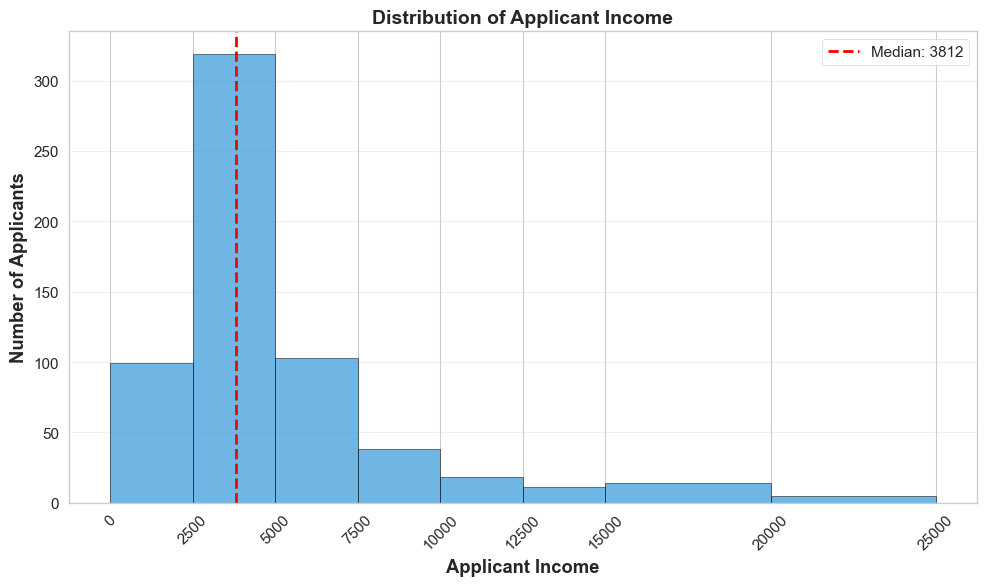

In [11]:
# Applicant Income Distribution
plt.figure(figsize=(10, 6))
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 20000, 25000]
plt.hist(train_df['ApplicantIncome'], bins=bins, color='#3498db', edgecolor='black', alpha=0.7)
plt.axvline(train_df['ApplicantIncome'].median(), color='red', linestyle='--', 
           linewidth=2, label=f'Median: {train_df["ApplicantIncome"].median():.0f}')
plt.title('Distribution of Applicant Income', fontsize=14, fontweight='bold')
plt.xlabel('Applicant Income', fontweight='bold')
plt.ylabel('Number of Applicants', fontweight='bold')
plt.xticks(bins, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{viz_folder}/03_applicant_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

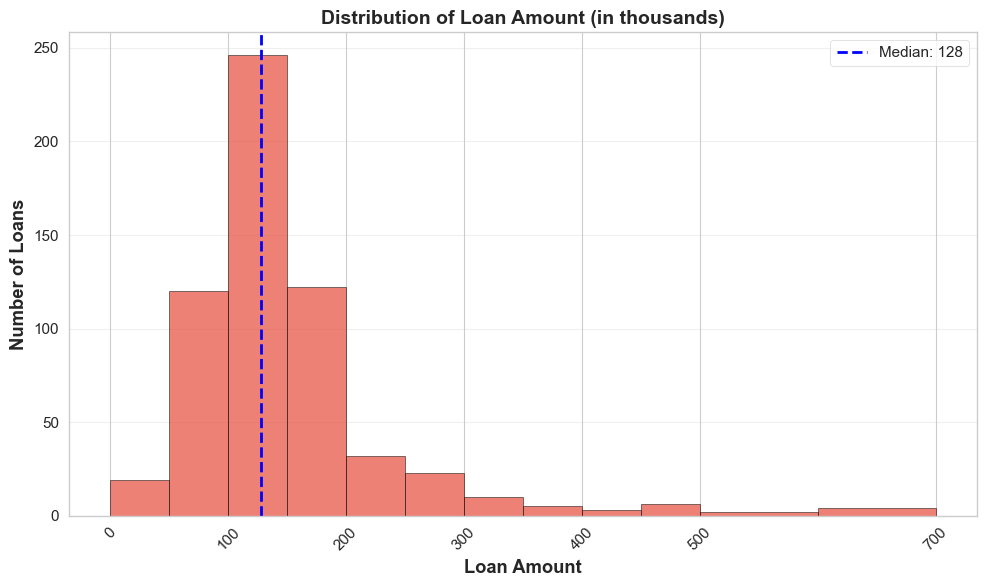

In [12]:
# Loan Amount Distribution
plt.figure(figsize=(10, 6))
loan_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700]
plt.hist(train_df['LoanAmount'].dropna(), bins=loan_bins, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.axvline(train_df['LoanAmount'].median(), color='blue', linestyle='--', 
           linewidth=2, label=f'Median: {train_df["LoanAmount"].median():.0f}')
plt.title('Distribution of Loan Amount (in thousands)', fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount', fontweight='bold')
plt.ylabel('Number of Loans', fontweight='bold')
plt.xticks(loan_bins[::2], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{viz_folder}/04_loan_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

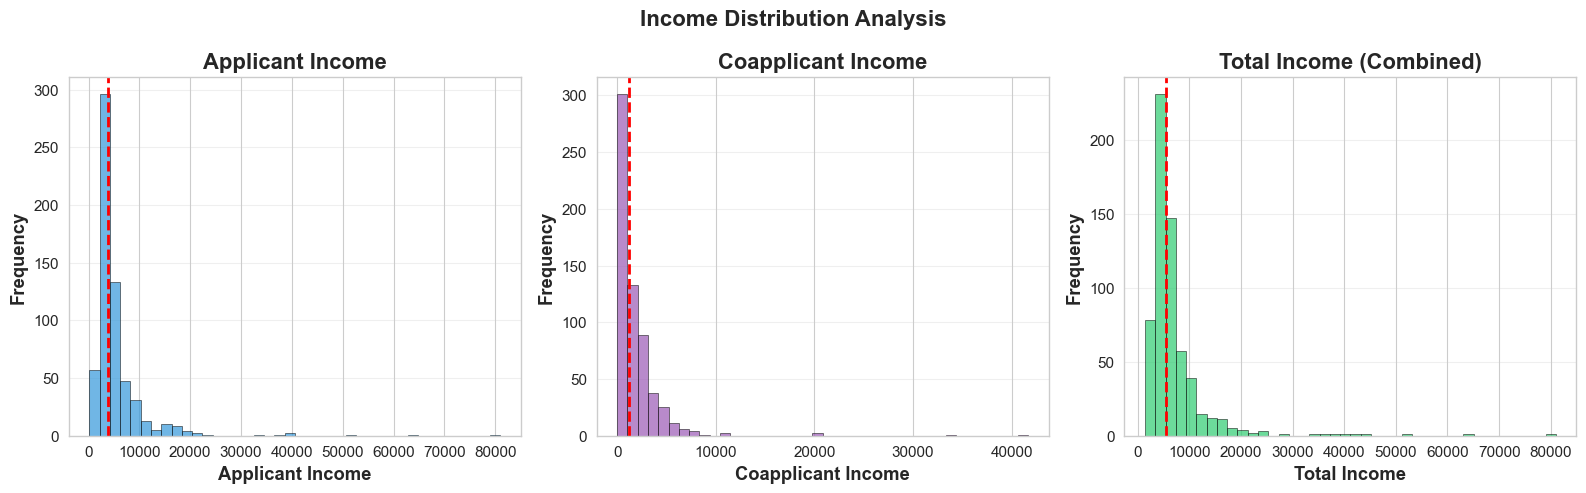

In [13]:
# Combined Income Analysis
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Income Distribution Analysis', fontsize=16, fontweight='bold')

# Applicant Income
axes[0].hist(train_df['ApplicantIncome'], bins=40, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(train_df['ApplicantIncome'].median(), color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Applicant Income', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Applicant Income', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Coapplicant Income
axes[1].hist(train_df['CoapplicantIncome'], bins=40, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1].axvline(train_df['CoapplicantIncome'].median(), color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Coapplicant Income', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Coapplicant Income', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Total Income
axes[2].hist(train_df['TotalIncome'], bins=40, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[2].axvline(train_df['TotalIncome'].median(), color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Total Income', fontweight='bold')
axes[2].set_ylabel('Frequency', fontweight='bold')
axes[2].set_title('Total Income (Combined)', fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_folder}/05_income_distribution_combined.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Credit History Impact Analysis (CRITICAL)

In [14]:
# Credit History vs Loan Status
print("="*70)
print("CREDIT HISTORY IMPACT ON LOAN APPROVAL")
print("="*70)

credit_loan = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], margins=True)
print("\nCrosstab (Counts):")
print(credit_loan)

credit_loan_pct = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'], normalize='index') * 100
print("\nApproval Rate by Credit History:")
print(credit_loan_pct.round(2))

CREDIT HISTORY IMPACT ON LOAN APPROVAL

Crosstab (Counts):
Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564

Approval Rate by Credit History:
Loan_Status         N      Y
Credit_History              
0.0             92.13   7.87
1.0             20.42  79.58


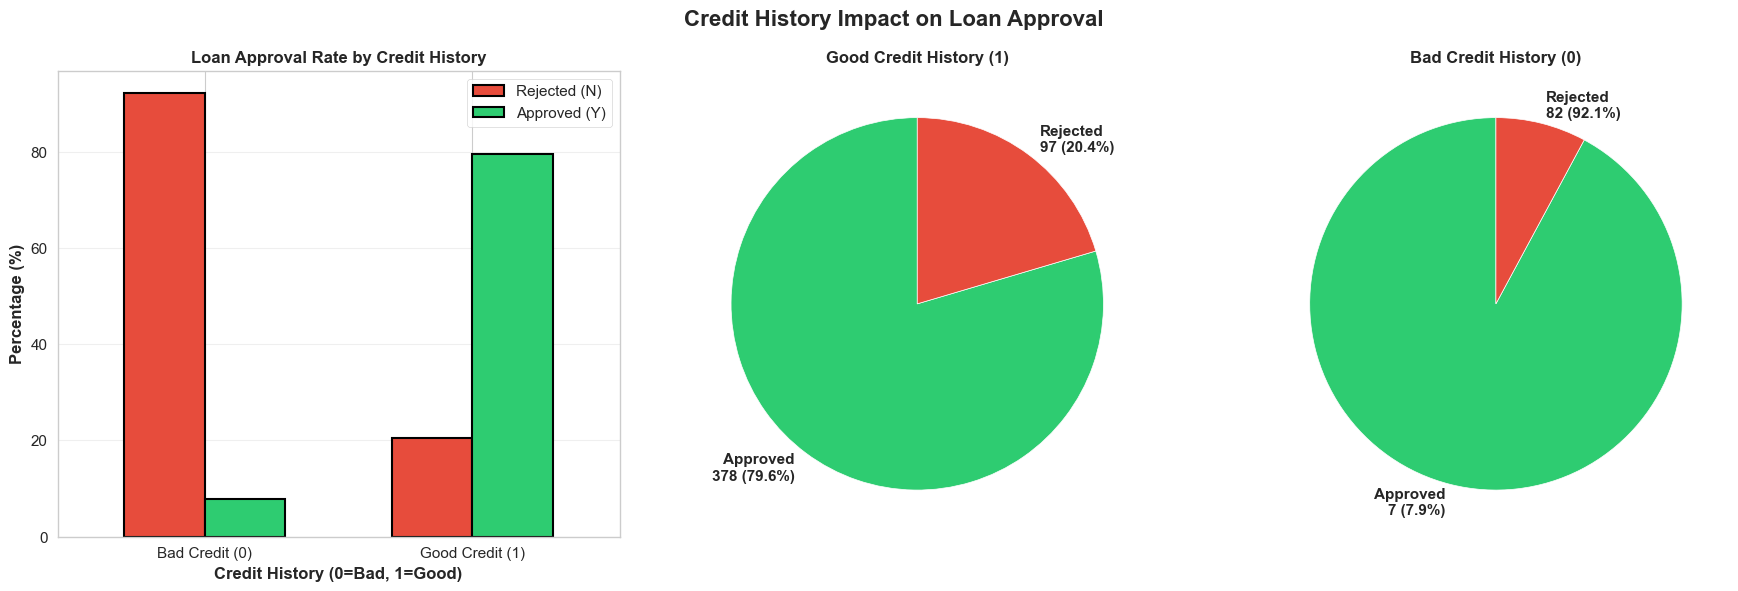


🔑 KEY INSIGHT: Credit History is the STRONGEST predictor of loan approval!
   - Good Credit (1): 79.6% approval rate
   - Bad Credit (0): 7.9% approval rate


In [15]:
# Visualization - Credit History Impact
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Credit History Impact on Loan Approval', fontsize=16, fontweight='bold')

# Bar chart - Approval rates
credit_loan_pct.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], 
                     edgecolor='black', linewidth=1.5, width=0.6)
axes[0].set_xlabel('Credit History (0=Bad, 1=Good)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
axes[0].set_title('Loan Approval Rate by Credit History', fontweight='bold', fontsize=12)
axes[0].legend(['Rejected (N)', 'Approved (Y)'], loc='best')
axes[0].set_xticklabels(['Bad Credit (0)', 'Good Credit (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart - Good Credit (1)
credit_1 = train_df[train_df['Credit_History'] == 1]['Loan_Status'].value_counts()
labels_1 = [f'Approved\n{credit_1["Y"]} ({credit_1["Y"]/credit_1.sum()*100:.1f}%)', 
           f'Rejected\n{credit_1["N"]} ({credit_1["N"]/credit_1.sum()*100:.1f}%)']
axes[1].pie(credit_1, labels=labels_1, autopct='', colors=['#2ecc71', '#e74c3c'], 
           startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Good Credit History (1)', fontweight='bold', fontsize=12)

# Pie chart - Bad Credit (0)
credit_0 = train_df[train_df['Credit_History'] == 0]['Loan_Status'].value_counts()
labels_0 = [f'Approved\n{credit_0["Y"]} ({credit_0["Y"]/credit_0.sum()*100:.1f}%)', 
           f'Rejected\n{credit_0["N"]} ({credit_0["N"]/credit_0.sum()*100:.1f}%)']
axes[2].pie(credit_0, labels=labels_0, autopct='', colors=['#2ecc71', '#e74c3c'], 
           startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[2].set_title('Bad Credit History (0)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(f'{viz_folder}/06_credit_history_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔑 KEY INSIGHT: Credit History is the STRONGEST predictor of loan approval!")
print(f"   - Good Credit (1): {credit_loan_pct.loc[1.0, 'Y']:.1f}% approval rate")
print(f"   - Bad Credit (0): {credit_loan_pct.loc[0.0, 'Y']:.1f}% approval rate")

## 8. Property Area Analysis

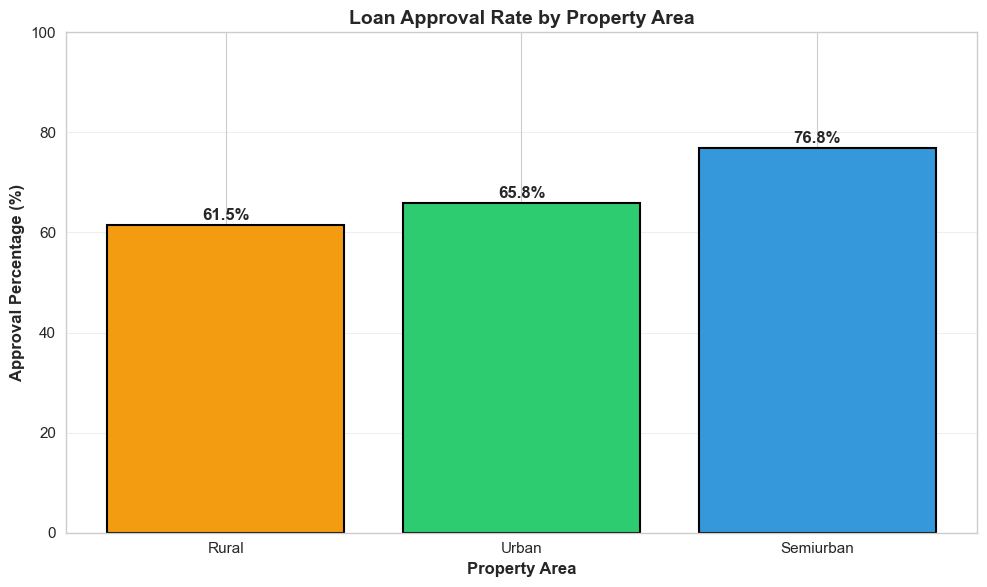


Approval Rates by Property Area:
  Rural: 61.45%
  Urban: 65.84%
  Semiurban: 76.82%


In [16]:
# Property Area vs Loan Status
property_approval = train_df.groupby('Property_Area')['Loan_Status'].apply(
    lambda x: (x == 'Y').mean() * 100).sort_values()

plt.figure(figsize=(10, 6))
bars = plt.bar(property_approval.index, property_approval, 
              color=['#f39c12', '#2ecc71', '#3498db'], edgecolor='black', linewidth=1.5)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.title('Loan Approval Rate by Property Area', fontsize=14, fontweight='bold')
plt.xlabel('Property Area', fontweight='bold', fontsize=12)
plt.ylabel('Approval Percentage (%)', fontweight='bold', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{viz_folder}/07_property_area_approval.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nApproval Rates by Property Area:")
for area, rate in property_approval.items():
    print(f"  {area}: {rate:.2f}%")

## 9. Education Level Analysis

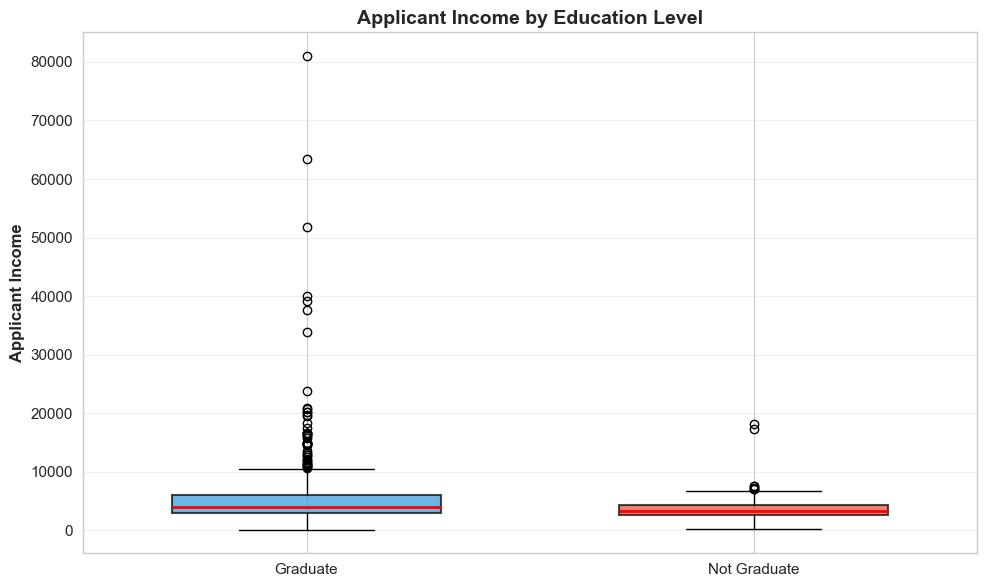

Graduate Median Income: 4000.00
Non-Graduate Median Income: 3357.50


In [17]:
# Box Plot: Income by Education Level
plt.figure(figsize=(10, 6))
graduate = train_df[train_df['Education'] == 'Graduate']['ApplicantIncome']
non_graduate = train_df[train_df['Education'] == 'Not Graduate']['ApplicantIncome']

boxes = plt.boxplot([graduate, non_graduate], 
                   labels=['Graduate', 'Not Graduate'], 
                   patch_artist=True, 
                   medianprops={'linewidth': 2, 'color': 'red'},
                   widths=0.6)

# Customize box appearance
colors = ['#3498db', '#e74c3c']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.title('Applicant Income by Education Level', fontsize=14, fontweight='bold')
plt.ylabel('Applicant Income', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{viz_folder}/08_education_income_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Graduate Median Income: {graduate.median():.2f}")
print(f"Non-Graduate Median Income: {non_graduate.median():.2f}")

## 10. Loan Amount vs Income Analysis

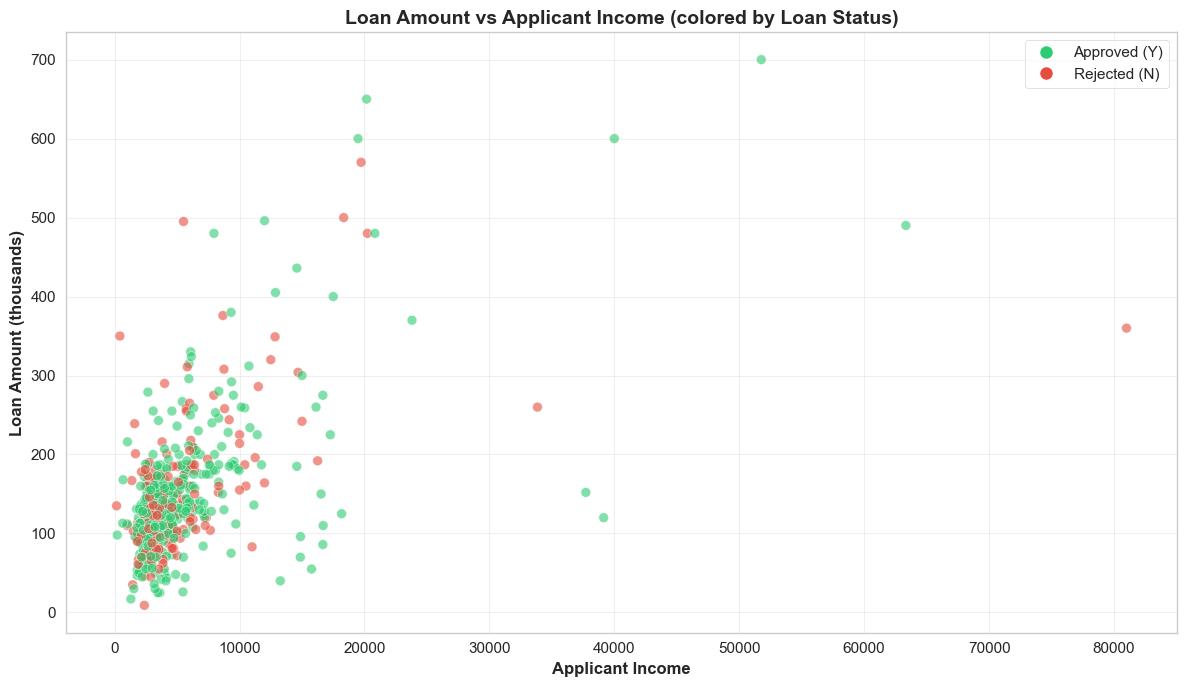

In [18]:
# Scatter Plot: Loan Amount vs Applicant Income
plt.figure(figsize=(12, 7))
colors_map = train_df['Loan_Status'].map({'Y': '#2ecc71', 'N': '#e74c3c'})
plt.scatter(train_df['ApplicantIncome'], train_df['LoanAmount'], 
           c=colors_map, alpha=0.6, edgecolors='w', s=50)

plt.title('Loan Amount vs Applicant Income (colored by Loan Status)', fontsize=14, fontweight='bold')
plt.xlabel('Applicant Income', fontweight='bold', fontsize=12)
plt.ylabel('Loan Amount (thousands)', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3)

# Add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2ecc71', 
           markersize=10, label='Approved (Y)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#e74c3c', 
           markersize=10, label='Rejected (N)')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig(f'{viz_folder}/09_loan_vs_income_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

## 11. Categorical Features vs Loan Status

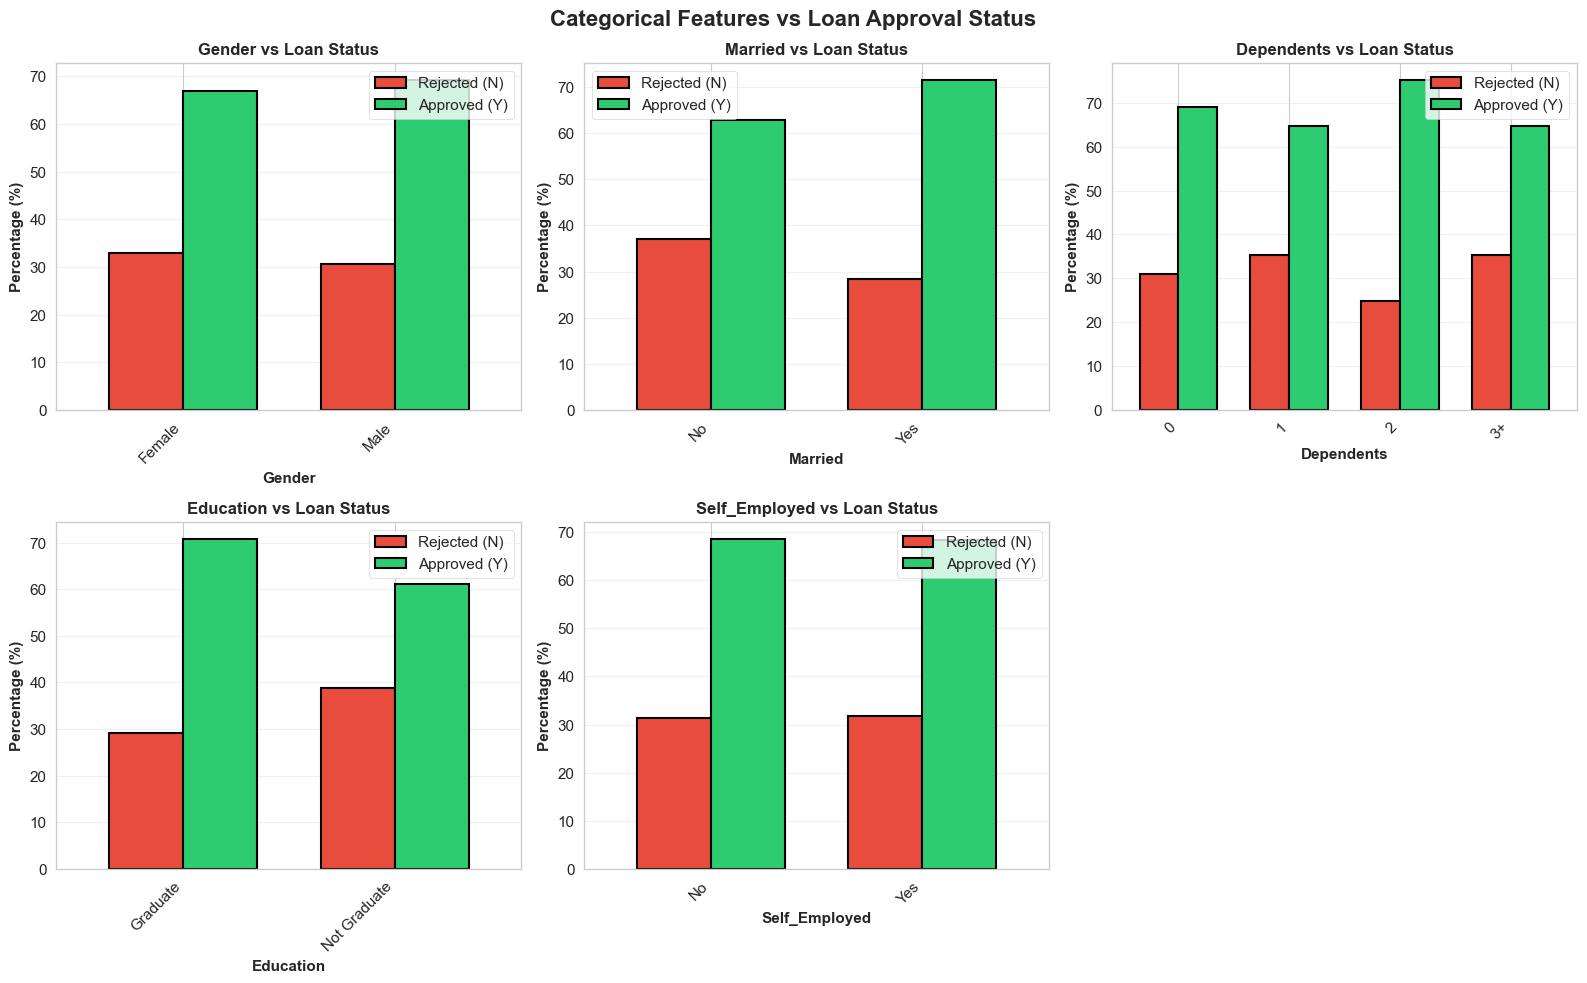

APPROVAL RATES BY CATEGORICAL FEATURES

Gender:
Loan_Status      N      Y
Gender                   
Female       33.04  66.96
Male         30.67  69.33

Married:
Loan_Status      N      Y
Married                  
No           37.09  62.91
Yes          28.39  71.61

Dependents:
Loan_Status      N      Y
Dependents               
0            31.01  68.99
1            35.29  64.71
2            24.75  75.25
3+           35.29  64.71

Education:
Loan_Status       N      Y
Education                 
Graduate      29.17  70.83
Not Graduate  38.81  61.19

Self_Employed:
Loan_Status        N      Y
Self_Employed              
No             31.40  68.60
Yes            31.71  68.29


In [19]:
# Analyze all categorical features against loan status
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Categorical Features vs Loan Approval Status', fontsize=16, fontweight='bold')

for idx, feature in enumerate(categorical_features):
    row = idx // 3
    col = idx % 3
    
    # Create crosstab
    ct = pd.crosstab(train_df[feature], train_df['Loan_Status'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[row, col], color=['#e74c3c', '#2ecc71'], 
            edgecolor='black', linewidth=1.5, width=0.7)
    axes[row, col].set_xlabel(feature, fontweight='bold', fontsize=11)
    axes[row, col].set_ylabel('Percentage (%)', fontweight='bold', fontsize=11)
    axes[row, col].set_title(f'{feature} vs Loan Status', fontweight='bold', fontsize=12)
    axes[row, col].legend(['Rejected (N)', 'Approved (Y)'], loc='best')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')
    axes[row, col].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig(f'{viz_folder}/10_categorical_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()

# Print approval rates
print("="*70)
print("APPROVAL RATES BY CATEGORICAL FEATURES")
print("="*70)
for feature in categorical_features:
    print(f"\n{feature}:")
    ct = pd.crosstab(train_df[feature], train_df['Loan_Status'], normalize='index') * 100
    print(ct.round(2))

## 12. Correlation Analysis

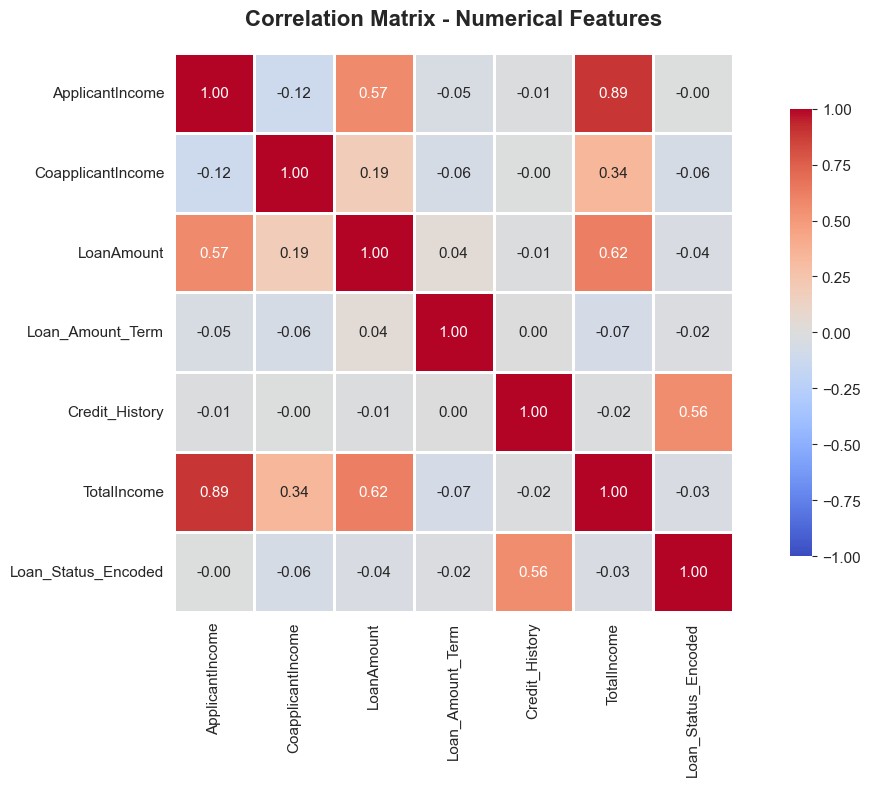

CORRELATION WITH LOAN APPROVAL
Loan_Status_Encoded    1.000000
Credit_History         0.561678
ApplicantIncome       -0.004710
Loan_Amount_Term      -0.021268
TotalIncome           -0.031271
LoanAmount            -0.037318
CoapplicantIncome     -0.059187
Name: Loan_Status_Encoded, dtype: float64

🔑 Credit_History has the strongest correlation with loan approval!


In [20]:
# Create a copy for correlation analysis
corr_df = train_df.copy()

# Encode target variable
corr_df['Loan_Status_Encoded'] = corr_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Select numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Loan_Status_Encoded']

# Calculate correlation matrix
correlation_matrix = corr_df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{viz_folder}/11_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print correlations with target
print("="*70)
print("CORRELATION WITH LOAN APPROVAL")
print("="*70)
target_corr = correlation_matrix['Loan_Status_Encoded'].sort_values(ascending=False)
print(target_corr)
print("\n🔑 Credit_History has the strongest correlation with loan approval!")

## 13. Outlier Detection

In [21]:
# Identify outliers using IQR method
print("="*70)
print("OUTLIER DETECTION (IQR METHOD)")
print("="*70)

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome']

for feature in outlier_features:
    count, lower, upper = detect_outliers(train_df, feature)
    pct = (count / len(train_df)) * 100
    print(f"\n{feature}:")
    print(f"  Outliers: {count} ({pct:.2f}%)")
    print(f"  Normal range: [{lower:.2f}, {upper:.2f}]")

OUTLIER DETECTION (IQR METHOD)

ApplicantIncome:
  Outliers: 50 (8.14%)
  Normal range: [-1498.75, 10171.25]

CoapplicantIncome:
  Outliers: 18 (2.93%)
  Normal range: [-3445.88, 5743.12]

LoanAmount:
  Outliers: 39 (6.35%)
  Normal range: [-2.00, 270.00]

TotalIncome:
  Outliers: 50 (8.14%)
  Normal range: [-867.62, 12555.38]


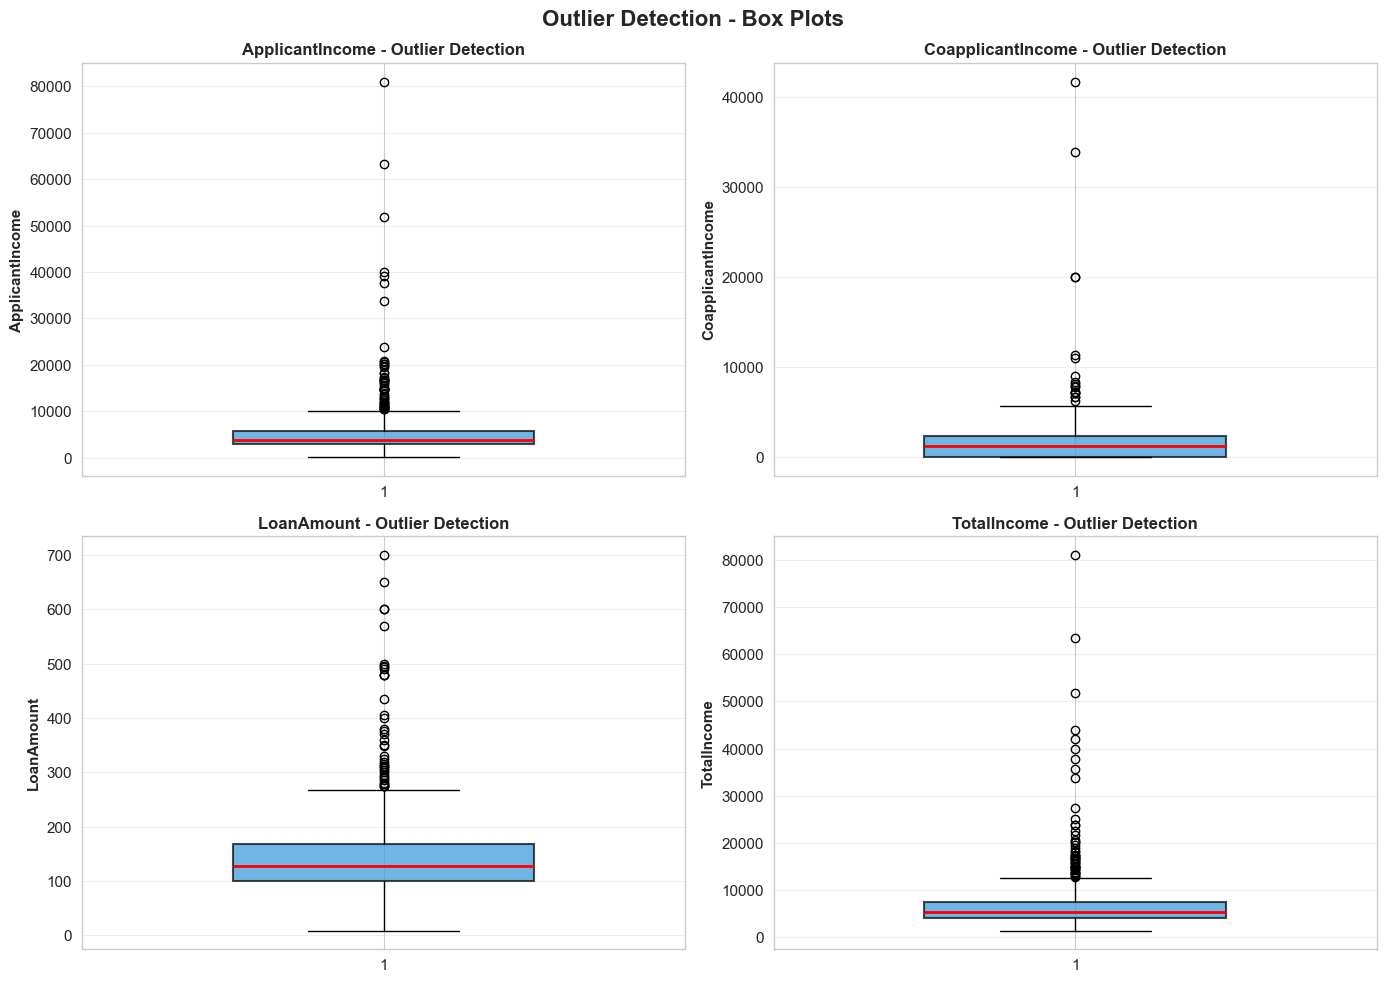

In [22]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

for idx, feature in enumerate(outlier_features):
    row = idx // 2
    col = idx % 2
    
    axes[row, col].boxplot(train_df[feature].dropna(), 
                          patch_artist=True,
                          boxprops=dict(facecolor='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5),
                          medianprops=dict(color='red', linewidth=2),
                          widths=0.5)
    axes[row, col].set_ylabel(feature, fontweight='bold', fontsize=11)
    axes[row, col].set_title(f'{feature} - Outlier Detection', fontweight='bold', fontsize=12)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{viz_folder}/12_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

## 14. Feature Engineering Insights

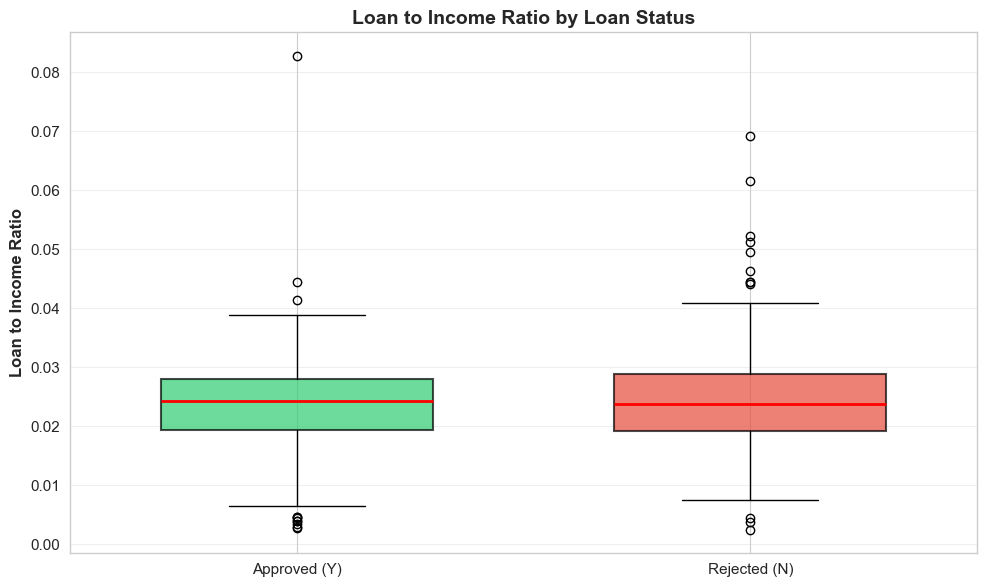

NEW FEATURES CREATED
1. TotalIncome: ApplicantIncome + CoapplicantIncome
2. Loan_Income_Ratio: LoanAmount / TotalIncome

💡 These features may improve model performance!


In [23]:
# Create new features
train_df['Loan_Income_Ratio'] = train_df['LoanAmount'] / train_df['TotalIncome']

# Visualize new feature
plt.figure(figsize=(10, 6))
approved_ratio = train_df[train_df['Loan_Status'] == 'Y']['Loan_Income_Ratio'].dropna()
rejected_ratio = train_df[train_df['Loan_Status'] == 'N']['Loan_Income_Ratio'].dropna()

boxes = plt.boxplot([approved_ratio, rejected_ratio], 
                   labels=['Approved (Y)', 'Rejected (N)'],
                   patch_artist=True,
                   medianprops={'linewidth': 2, 'color': 'red'},
                   widths=0.6)

colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.ylabel('Loan to Income Ratio', fontweight='bold', fontsize=12)
plt.title('Loan to Income Ratio by Loan Status', fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f'{viz_folder}/13_loan_income_ratio.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*70)
print("NEW FEATURES CREATED")
print("="*70)
print("1. TotalIncome: ApplicantIncome + CoapplicantIncome")
print("2. Loan_Income_Ratio: LoanAmount / TotalIncome")
print("\n💡 These features may improve model performance!")

## 15. Summary Statistics

In [24]:
# Print column information
print("="*70)
print("COLUMNS IN TRAINING DATASET")
print("="*70)
for i, col in enumerate(train_df.columns, 1):
    print(f"{i}. {col} - {train_df[col].dtype}")

print("\n" + "="*70 + "\n")

print("="*70)
print("COLUMNS IN TEST DATASET")
print("="*70)
for i, col in enumerate(test_df.columns, 1):
    print(f"{i}. {col} - {test_df[col].dtype}")

COLUMNS IN TRAINING DATASET
1. Loan_ID - object
2. Gender - object
3. Married - object
4. Dependents - object
5. Education - object
6. Self_Employed - object
7. ApplicantIncome - int64
8. CoapplicantIncome - float64
9. LoanAmount - float64
10. Loan_Amount_Term - float64
11. Credit_History - float64
12. Property_Area - object
13. Loan_Status - object
14. TotalIncome - float64
15. Loan_Income_Ratio - float64


COLUMNS IN TEST DATASET
1. Loan_ID - object
2. Gender - object
3. Married - object
4. Dependents - object
5. Education - object
6. Self_Employed - object
7. ApplicantIncome - int64
8. CoapplicantIncome - int64
9. LoanAmount - float64
10. Loan_Amount_Term - float64
11. Credit_History - float64
12. Property_Area - object


## 16. Key Insights & Findings

### 📊 Summary of Key Findings:

#### **1. Target Variable (Loan_Status)**
- ✅ **68.7%** of loans are approved (Y)
- ❌ **31.3%** of loans are rejected (N)
- Dataset is moderately imbalanced

#### **2. Missing Data**
- **Credit_History**: 8.14% missing (CRITICAL - needs imputation)
- **Self_Employed**: 5.21% missing
- **LoanAmount**: 3.58% missing
- **Other features**: <3% missing

#### **3. Most Important Features (Based on Analysis)**
1. 🔑 **Credit_History** - Strongest predictor (~80% approval with good credit vs ~7% with bad credit)
2. 💰 **TotalIncome** (Applicant + Coapplicant)
3. 🎓 **Education** - Graduates have higher approval rates
4. 💍 **Married** - Married applicants have higher approval rates
5. 🏘️ **Property_Area** - Semiurban has highest approval rate

#### **4. Income Patterns**
- Median Applicant Income: **3,812**
- Median Coapplicant Income: **1,188**
- Median Total Income: **5,188**
- Significant outliers exist (max income: 81,000)
- Approved loans have slightly higher median income

#### **5. Loan Characteristics**
- Most common loan term: **360 months (30 years)**
- Median loan amount: **128,000**
- Loan amounts range from 9,000 to 700,000

#### **6. Categorical Insights**
- **Gender**: Male applicants dominate (80%+)
- **Married**: ~65% of applicants are married
- **Education**: ~78% are graduates
- **Self_Employed**: Only ~14% are self-employed
- **Dependents**: Most have 0-1 dependents

#### **7. Correlations**
- **Credit_History** has the strongest correlation with loan approval
- **LoanAmount** and **TotalIncome** are positively correlated
- **ApplicantIncome** and **CoapplicantIncome** are weakly correlated

---

### 🎯 Recommendations for Model Building:

1. **Handle Missing Values:**
   - Impute Credit_History (mode or predictive imputation)
   - Impute Self_Employed (mode)
   - Impute LoanAmount (median or mean)

2. **Feature Engineering:**
   - Create TotalIncome = ApplicantIncome + CoapplicantIncome ✅
   - Create Loan_Income_Ratio ✅
   - Consider log transformation for skewed features

3. **Handle Outliers:**
   - Consider capping extreme income values
   - Or use robust models (tree-based)

4. **Encoding:**
   - One-hot encode: Property_Area, Dependents
   - Label encode: Gender, Married, Education, Self_Employed

5. **Class Imbalance:**
   - Consider SMOTE or class weights
   - Use stratified sampling

6. **Model Selection:**
   - Start with Logistic Regression (baseline)
   - Try Random Forest, XGBoost, LightGBM
   - Ensemble methods may work well

7. **Evaluation Metrics:**
   - Use Accuracy, Precision, Recall, F1-Score
   - ROC-AUC for probability predictions
   - Confusion Matrix for detailed analysis

---

### ✅ Next Steps:
1. **Data Preprocessing** (Notebook 02)
2. **Feature Engineering** (Notebook 03)
3. **Model Building** (Notebook 04)
4. **Model Evaluation & Tuning** (Notebook 05)
5. **Final Predictions** (Notebook 06)

## 17. Final Summary & File List

In [25]:
# ✅ FINAL SUMMARY - List all saved visualizations
print("="*70)
print("✅ DATA EXPLORATION COMPLETE!")
print("="*70)
print(f"\n📁 All visualizations saved to: {viz_folder}\n")

# List all saved files
saved_files = [
    "01_missing_values_analysis.png",
    "02_target_variable_distribution.png",
    "03_applicant_income_distribution.png",
    "04_loan_amount_distribution.png",
    "05_income_distribution_combined.png",
    "06_credit_history_impact.png",
    "07_property_area_approval.png",
    "08_education_income_boxplot.png",
    "09_loan_vs_income_scatter.png",
    "10_categorical_vs_loan_status.png",
    "11_correlation_heatmap.png",
    "12_outlier_detection.png",
    "13_loan_income_ratio.png"
]

print("📊 Saved Visualizations:")
for i, file in enumerate(saved_files, 1):
    file_path = os.path.join(viz_folder, file)
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / 1024  # KB
        print(f"  {i:2d}. ✅ {file} ({file_size:.1f} KB)")
    else:
        print(f"  {i:2d}. ⏳ {file} (Will be created when cell runs)")

print("\n" + "="*70)
print("🎯 Ready to proceed with data preprocessing and model building.")
print("💡 Key Insight: Credit History is the strongest predictor!")
print("   - Good Credit (1): ~80% approval rate")
print("   - Bad Credit (0): ~7% approval rate")
print("="*70)

✅ DATA EXPLORATION COMPLETE!

📁 All visualizations saved to: ../visualizations/eda_plots

📊 Saved Visualizations:
   1. ✅ 01_missing_values_analysis.png (152.7 KB)
   2. ✅ 02_target_variable_distribution.png (181.3 KB)
   3. ✅ 03_applicant_income_distribution.png (125.4 KB)
   4. ✅ 04_loan_amount_distribution.png (103.2 KB)
   5. ✅ 05_income_distribution_combined.png (176.0 KB)
   6. ✅ 06_credit_history_impact.png (274.7 KB)
   7. ✅ 07_property_area_approval.png (101.4 KB)
   8. ✅ 08_education_income_boxplot.png (103.8 KB)
   9. ✅ 09_loan_vs_income_scatter.png (392.6 KB)
  10. ✅ 10_categorical_vs_loan_status.png (367.4 KB)
  11. ✅ 11_correlation_heatmap.png (294.3 KB)
  12. ✅ 12_outlier_detection.png (292.8 KB)
  13. ✅ 13_loan_income_ratio.png (110.5 KB)

🎯 Ready to proceed with data preprocessing and model building.
💡 Key Insight: Credit History is the strongest predictor!
   - Good Credit (1): ~80% approval rate
   - Bad Credit (0): ~7% approval rate


---

### 📁 Generated Visualizations:
1. `01_missing_values_analysis.png`
2. `02_target_variable_distribution.png`
3. `03_applicant_income_distribution.png`
4. `04_loan_amount_distribution.png`
5. `05_income_distribution_combined.png`
6. `06_credit_history_impact.png` ⭐ **MOST IMPORTANT**
7. `07_property_area_approval.png`
8. `08_education_income_boxplot.png`
9. `09_loan_vs_income_scatter.png`
10. `10_categorical_vs_loan_status.png`
11. `11_correlation_heatmap.png`
12. `12_outlier_detection.png`
13. `13_loan_income_ratio.png`

---

**Date:** December 25, 2025  
**Status:** ✅ Complete and Ready for Model Building  
**Key Finding:** Credit History is the strongest predictor of loan approval